# Ejercicios de mecánica de fluidos.

### Jose Fernando Jiménez

In [1]:
%matplotlib inline

# Temas:

- Propiedades de los fluidos
- Estática de fluidos
- Ecuación de Bernoulli
- Cinemática de fluidos
- Análisis de volúmen de control finito
- Análisis dimensional
- Flujo viscoso en tuberías

# Propiedades de los fluidos

## 1. 

La variación de la dencidad del agua, $\rho$, con la temperatura, T, en el intervalo $20^{\circ}C \leq T \leq 60^{\circ}C$ está dada por la siguiente tabla:

<img src="FigurasEjercicios/1_1.png">

Usar los datos para determinar una ecuación empírica de la forma $\rho = c_{1} + c_{2}T+c_{3}T^{2}$ la cuál pueda ser usada para predecir la densidad en el rango indicado. Compare los valores predichos con los datos dados. Cuál es la densidad del agua a 42.1 $^{\circ}$C?

#### Desarrollo

In [2]:
import numpy as np
import pandas as pd
import math
import scipy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
# Lectura de datos

dataframe = pd.read_csv('DatosEjercicios/1_1.csv')
y = dataframe['Density'].values
x = dataframe['Temperature'].values

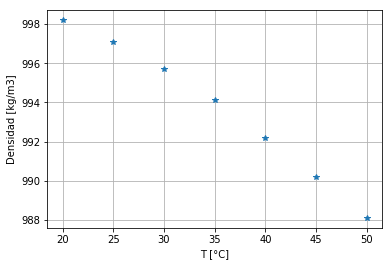

In [4]:
plt.figure()
plt.plot(x,y,'*')
plt.xlabel(u'T [°C]')
plt.ylabel(u'Densidad [kg/m3]')
plt.grid()
plt.show()

In [5]:
## Obtención de coeficientes

olsres2 = smf.ols(formula = 'Density ~ I(Temperature) + I(Temperature**2)', data = dataframe).fit()
coefs = olsres2.params.get_values()
print 'Coeficientes:'
print coefs

Coeficientes:
[  1.00095000e+03  -5.33333333e-02  -4.09523810e-03]


In [6]:
def calcula_densidad(Temperatura): #Temperatura en grados centígrados
    if (Temperatura >= 20)&(Temperatura<=60):
        densidad = coefs[0] + coefs[1] * Temperatura + coefs[2] * (Temperatura**2)
        return densidad
    
    else:
        
        print('No se puede calcular')

In [7]:
pred = []
for i in range(len(x)):
    pred.append(calcula_densidad(x[i])) 
pred = np.array(pred)

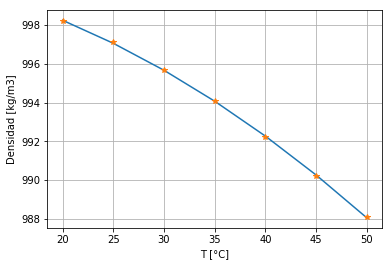

In [8]:
plt.plot(x,pred)
plt.plot(x,y,'*')
plt.xlabel(u'T [°C]')
plt.ylabel(u'Densidad [kg/m3]')
plt.grid()

In [9]:
# Para 42.1°C
print str(calcula_densidad(42.1))  + ' [kg/m3]'

991.446225714 [kg/m3]


## 2.

Desarrolle un programa para calcular la densidad de un gas ideal cuando la presión del gas se encuentra en pascales (presión absoluta), y la constante del gas está en $J/(kg K).$

#### Desarrollo

Para un gas ideal, la presión se define como: $ p = \rho R T $, entonces $ \rho = \frac{p}{RT}$ 

In [10]:
# Creamos una función que lo resuelva

def calcula_densidad(p,T,R): #presión absoluta en pascales,
    #temperatura en grados centígrados
    #Constante del gas en J/kg*K
    Tk = T + 273.15 #convierte a kelvin
    d = p/(R*Tk)
    return d
    

In [11]:
#ejemplo:  presión 200*10³ Pa, temperatura 20°C, Constante del gas 287 J/kg*K
d = calcula_densidad(200e3,20,287) 

print 'Densidad: '+str(d)+' kg/m3'

Densidad: 2.37715883165 kg/m3


## 3.

Dados los valores de viscosidad del aire para temperaturas de 0, 20, 60, 80 y 100 °C determine las constantes C y S que aparecen en la ecuación de Sutherland:

\begin{equation}
    \mu = \frac{C T^{3/2}}{T + S}
\end{equation}

Que se puede escribir de la forma:

\begin{equation}
    \frac{T^{3/2}}{\mu} = (\frac{1}{C}) T + \frac{S}{C}
\end{equation}

Grafique $T^{3/2} / \mu$ contra $T$ y obtenga las constantes C y S.

#### Desarrollo

In [12]:
# Creamos un array de temperaturas en grados centígrados

T = np.array([0,20,40,60,80,100])

#La temperatura en Kelvin va a ser

Tk = T + 273.15

#Los coeficientes de viscosidad para las temperaturas indicadas en [N*s/m2], 
#de acuerdo al libro son:

mu = np.array([1.71,1.82,1.87,1.97,2.07,2.17])*(10**-5)

# El valor de (T^(3/2))/(mu) en [K^(3/2) / (kg / (m/s))] es:

T32_mu = (Tk**(3/2.))/mu

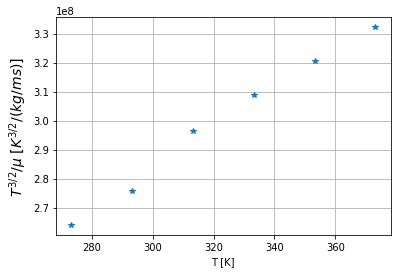

In [13]:
plt.plot(Tk,T32_mu,'*')
plt.xlabel(u'T [K]')
plt.ylabel(r'$T^{3/2}/\mu$ [$K^{3/2}/ (kg/ms)$]',fontsize=14)
plt.grid()

Ahora, se aproximan los datos a un alinea recta, que puede ser representada de la forma $y=bx+a$ donde $y = T^{3/2}/\mu$, $x = T$, $b = 1/C$, y $a = S/C$.

In [14]:
#Realizamos la regresión y hallamos los coeficientes.

Data = {'x':  Tk,
        'y': T32_mu}
dataframe = pd.DataFrame(Data,columns = Data.keys())
olsres2 = smf.ols(formula = 'y ~ I(x) + I(x)', data = dataframe).fit()
coefs = olsres2.params.get_values()
print 'a = '+str(coefs[0])
print 'b = '+str(coefs[1])

a = 74467261.1314
b = 696664.38297


In [15]:
#Calcular predicción para los datos existentes.
pred = coefs[1]*Tk + coefs[0]

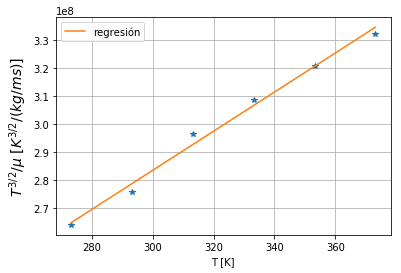

In [16]:
plt.plot(Tk,T32_mu,'*')
plt.plot(Tk,pred,label= u'regresión')
plt.xlabel(u'T [K]')
plt.ylabel(r'$T^{3/2}/\mu$ [$K^{3/2}/ (kg/ms)$]',fontsize=14)
plt.legend()
plt.grid()

Con C = 1/b y S = a*C, se tiene:

In [17]:
C = 1/ coefs[1]
print 'C = '+str(1/ coefs[1])+r' [kg / (m s K^{1/2})]'
print 'S = '+str(coefs[0] * C)+r' [K]'

C = 1.43541140389e-06 [kg / (m s K^{1/2})]
S = 106.891155845 [K]


## 4.

Aire en condiciones estándar pasa a través de una superficie plana, las medidas de velocidad cerca a la superficie indican la siguiente distribución:

<img src="FigurasEjercicios/1_4.png">

La coordenada y se mide normal a la superficie y u es la velocidad paralela a la superficie.

- Asuma que la distribución de velocidades es de la forma $u = C1 y + C2 y^{3}$, determine las constantes C1 y C2.
- Determine la magnitud del esfuerzo cortante en la placa (y=0) y en y=0.05 ft.


#### Desarrollo

In [18]:
# tenemos que y es igual a:
y = np.array([0.005,0.01,0.02,0.04,0.06,0.08])
# u:
u = np.array([0.74,1.51,3.03,6.37,10.21,14.43])

In [19]:
#Realizamos la regresión y hallamos los coeficientes.

Data = {'y':  y,
        'u': u}
dataframe = pd.DataFrame(Data,columns = Data.keys())
olsres2 = smf.ols(formula = 'u ~ I(y) + I(y**3) - 1', data = dataframe).fit() 
#el -1 es para indicar que es sin intercepto
coefs = olsres2.params.get_values()


C1 = coefs[0]
C2 = coefs[1]
print 'C1 = '+str(C1)+' s^-1'
print 'C2 = '+str(C2)+' ft^-2 s^-1'

C1 = 152.992370948 s^-1
C2 = 4345.36251379 ft^-2 s^-1


El esfuerzo cortante se define como:

\begin{equation}
    \tau = \mu \frac{du}{dy}
\end{equation}

de donde se deriva:

\begin{equation}
    \tau = \mu (C1 + 3 C2 y^{2})
\end{equation}

In [20]:
#para y = 0, asumiendo una viscosidad de 3.74*10^-7 lb*s/ft2 

tau0 = 3.74*(10**-7) * (C1 + 3*C2*(0**2))
tau005 = 3.74*(10**-7) * (C1 + 3*C2*(0.05**2))

In [21]:
print 'En y=0 el esfuerzo cortante es:'
print str(tau0) + ' lb/ft2'

En y=0 el esfuerzo cortante es:
5.72191467345e-05 lb/ft2


In [22]:
print 'En y=0.05 ft el esfuerzo cortante es:'
print str(tau005) + ' lb/ft2'

En y=0.05 ft el esfuerzo cortante es:
6.94078885857e-05 lb/ft2


## 5.

Se obtuvieron datos de torque y velocidad angular con un viscosímetro como el que se muestra a continuacion:

<img src="FigurasEjercicios/1_5.png">

Los datos obtenidos son los siguientes:

<img src="FigurasEjercicios/1_5_2.png">

Las medidas del viscosímetro son $R_{0} = 2.5 in$, $R_{i}=2.45 in$, y $l = 5.0 in$. Determine la viscosidad del líquido contenido en el viscosímetro.

#### Desarrollo

El torque, $\tau$, se relaciona con la velocidad angular, \omega, a partir de la ecuación:

\begin{equation}
    \tau = \frac{2 \pi R_{i}^{3} l \mu}{R_{0}-R_{i}} \omega
\end{equation}

Entonces, para una geometría fija, y una viscosidad constante, la expresión anterior se puede mostrar de la forma:

\begin{equation}
    y = b x
\end{equation}

con $y = \tau$ y $x= \omega$

Donde b es una constante igual a:

\begin{equation}
    b = \frac{2 \pi R_{i}^{3} l \mu}{R_{0}-R_{i}}
\end{equation}

Se obtiene b a partir de una regresión lineal, 

In [23]:
torque = np.array([13.1,26.0,39.5,52.7,64.9,78.6])
w = np.array([1,2,3,4,5,6])


In [24]:
#Realizamos la regresión y hallamos los coeficientes.

Data = {'x':  w,
        'y': torque}
dataframe = pd.DataFrame(Data,columns = Data.keys())
olsres2 = smf.ols(formula = 'y ~ I(x) - 1', data = dataframe).fit() 
#el -1 es para indicar que es sin intercepto
coefs = olsres2.params.get_values()


b = coefs[0]
print 'b = '+str(b)+' ft * lb * s'

b = 13.0824175824 ft * lb * s


Ahora se debe despejar de la expresión para $b$ el valor de $\mu$.

\begin{equation}
    \mu = \frac{b (R_{0}-R_{i})}{2 \pi R_{i}^{3} l}
\end{equation}

de esa manera,

In [25]:
mu = (b)*((2.5-2.45)/12)/(2*np.pi*((2.45/12)**3)*(5/12.))

In [26]:
print 'El valor de la viscosidad para el fluido es: ' + str(mu) +\
    ' [lb s ft^-2]'

El valor de la viscosidad para el fluido es: 2.44654734258 [lb s ft^-2]


## 6.

Desarrolle un algoritmo para calcular la presión manométrica final de un gas cuando se tiene la presión inicial, los volúmenes iniciales y finales, la presión atmosférica, y se sabe si el proceso es isotérmico o isentrópico. (todo en sistema inglés)

#### Desarrollo

Para compresión o expansión,

\begin{equation}
    \frac{p}{\rho^{k}} = constante
\end{equation}

donde $k=1$ para un proceso isotérmico, y $k= tasa \, de \, calor \, específico$ para proceso isentrópico. Entonces,


\begin{equation}
    \frac{p_{i}}{\rho_{i}^{k}} = \frac{p_{f}}{\rho_{f}^{k}}
\end{equation}

Donde $i$ indica el estado incial, y $f$ el estado final, de esta forma:

\begin{equation}
    p_{f} = (\frac{\rho_{f}}{\rho_{i}})^{k} p_{i}
\end{equation}

como $\rho = m/V$, entonces,

\begin{equation}
    \frac{\rho_{f}}{\rho_{i}} = \frac{V_{i}}{V_{f}}
\end{equation}

Donde $V_{i}$, $V_{f}$, son los volúmenes iniciales y finales respectivamente, entonces se tiene que:

\begin{equation}
    p_{fg}+p_{atm} = (\frac{V_{i}}{V_{f}})^{k} (p_{ig}+p_{atm})
\end{equation}

Donde g se refiere a la presión manométrica, de lo anterior, se obtiene una expresión para la presión final:

\begin{equation}
    p_{fg} = (\frac{V_{i}}{V_{f}})^{k} (p_{ig}+p_{atm}) - p_{atm}
\end{equation}

In [27]:
# Se crea entonces una función que calcule la presión final:

def calcula_presion_final(pi, vi, vf, patm, process_type='isentropico',k=None):
    
    ## pi presión inicial manométrica en psi
    ## vi volumen inicial 
    ## vf volumen final
    ## patm presión atmosférica en psi
    ## process_type, string, "isentropico" o "isotérmico", es isentropico por defecto
    ## Si el proceso es isotérmico, k = 1, sino, ingresar specific heat ratio
    
    pabsi = pi + patm
    
    if process_type == 'isentropico':
        k=k
    elif process_type == 'isotermico':
        k=1
    
    pabsf = pabsi * ((vi/vf)**k)
    
    pf = pabsf - patm
    
    return pf
    

Se prueba el algoritmo para un caso en específico, presión inicial de 25 psi, volumen inicial de 1, volumen final de 0.3333, presión atmosférica de 14.7 psi, proceso isotérmico,

In [28]:
pf = calcula_presion_final(25,1,0.3333,14.7,'isotermico')

In [29]:
print 'La presión manométrica final del gas es Pf = '+str(pf)+' psi.'

La presión manométrica final del gas es Pf = 104.411911191 psi.


## 7.

El ascenso capilar en un tubo depende de la limpieza tanto del fluido como del tubo, normalmente, los valores de h son menores que los predichos por la ecuación:

\begin{equation}
    h = \frac{2\sigma cos \theta}{\gamma} \frac{1}{R} = \frac{4 \sigma cos \theta}{\gamma} \frac{1}{d} 
\end{equation}

cuando se usan valores de $\sigma$ y $\theta$ para fluidos y tubos limpios. A continuación se dan algunas medidas de la altura, $h$, que una columna de agua se eleva en un tubo vertical abierto de diámetro d. El agua es de grifo a una temperatura de 60°F, el tubo no fue limpiado antes de las medidas.

Ajuste una curva a los datos y estime el valor del producto $\sigma cos \theta$. Si se asume un valor de $\sigma$ de $5.03 10^{-3} lb/ft$, cuál sería el valor de $\theta$?. Si se asume que $\theta = 0$°, cuál es el valor de $\sigma$?   

<img src="FigurasEjercicios/1_7.png">

#### Desarrollo

La ecuación anterior se puede escribir de la forma $h = b d'$, donde:

\begin{equation}
    b = \frac{4 \sigma cos \theta}{\gamma}
\end{equation}

y, 

\begin{equation}
    d' = \frac{1}{d}
\end{equation}

In [30]:
d = np.array([0.3,0.25,0.2,0.15,0.1,0.05])/12. #En pies.
h = np.array([0.133,0.165,0.198,0.273,0.421,0.796])/12. #En pies

In [31]:
dp = 1/d

Se ajusta una regresión de la forma y = bx para obtener la pendiente b.

In [32]:
#Realizamos la regresión y hallamos los coeficientes.

Data = {'dp':  dp,
        'h': h}
dataframe = pd.DataFrame(Data,columns = Data.keys())
olsres2 = smf.ols(formula = 'h ~ I(dp) - 1', data = dataframe).fit() 
#el -1 es para indicar que es sin intercepto
coefs = olsres2.params.get_values()


b = coefs[0]
print 'b = '+str(b)+' ft^2'

pred = dp*b

b = 0.000279886074378 ft^2


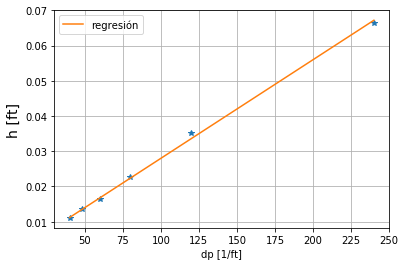

In [33]:
plt.plot(dp,h,'*')
plt.plot(dp,pred,label= u'regresión')
plt.xlabel(u'dp [1/ft]')
plt.ylabel(r'h [ft]',fontsize=14)
plt.legend()
plt.grid()

De esa manera, 

\begin{equation}
    \sigma cos \theta = \frac{b \gamma}{4}
\end{equation}

In [34]:
print 'Igual a:'

sigmacostheta = b * 62.4/4

print str(sigmacostheta) + ' lb/ft'

Igual a:
0.00436622276029 lb/ft


Si $\sigma$ = $5.03 x10^{-3} lb/ft$,

In [35]:
print 'theta igual a:'

theta = np.degrees(np.arccos(sigmacostheta/(5.03*(10**-3))))

print str(theta)+ '°'


theta igual a:
29.768755479°


Si $\theta = 0$°, entonces $cos \theta = 1$, y $\sigma = \sigma cos \theta$ 

# Estática

## 1.

En un líquido en reposo, se tomaron medidas de peso específico a varias profundidades, como se muestra en la siguiente tabla:

<img src="FigurasEjercicios/2_1.png">
<img src="FigurasEjercicios/2_1_1.png">

La profundidad h=0, corresponde a la superficie libre, a presión atmosférica. Determine, a través de integración numérica de la ecuación siguiente, la correspondiente variación en la presión, y muestre los resultados en una gráfica de presión (psf) versus profundidad (ft).

\begin{equation}
    \frac{dp}{dz} = -\gamma
\end{equation}

#### Desarrollo

<img src="FigurasEjercicios/2_1_2.png">

Definimos $z = h_{0} - h$, de manera que $dz = -dh$, de esta manera, 

\begin{equation}
    dp = -\gamma dz = \gamma dh
\end{equation}

Así,

\begin{equation}
    \int_{0}^{pi} dp = \int_{0}^{hi} \gamma dh
\end{equation}

\begin{equation}
    p_{i} = \int_{0}^{hi} \gamma dh
\end{equation}

Donde $p_{i}$ es la presión a la profundidad $h_{i}$.

In [36]:
h = np.arange(0,101,10)
gamma = np.array([70,76,84,91,97,102,107,110,112,114,115])

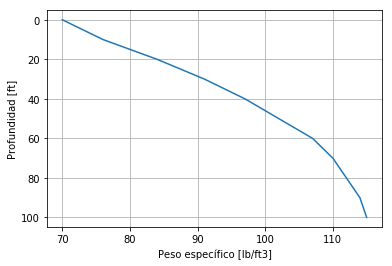

In [37]:
plt.plot(gamma,h)
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(u'Peso específico [lb/ft3]')
plt.ylabel(u'Profundidad [ft]')
plt.show()

In [38]:
#Se integra la última expresión hasta cada h, desde 0 hasta 100 ft.

presion = []
print u'h [ft], presión [psf]'
for i in range(len(gamma)):
    presion.append(np.trapz(gamma[:i+1],h[:i+1]))
    print str(h[i]),', ', str(np.trapz(gamma[:i+1],h[:i+1]))
    
presion = np.array(presion)

h [ft], presión [psf]
0 ,  0.0
10 ,  730.0
20 ,  1530.0
30 ,  2405.0
40 ,  3345.0
50 ,  4340.0
60 ,  5385.0
70 ,  6470.0
80 ,  7580.0
90 ,  8710.0
100 ,  9855.0


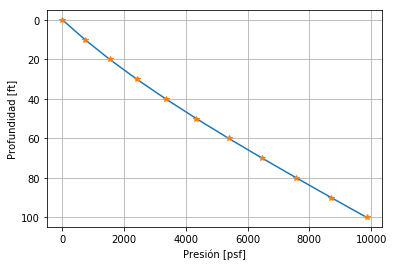

In [39]:
plt.plot(presion,h)
plt.plot(presion,h,'*')
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(u'Presión [psf]')
plt.ylabel(u'Profundidad [ft]')
plt.show()

## 2.

Bajo condiciones normales la temperatura de la atmósfera disminuye con la elevación, en algunas situaciones, se presenta inversión de la temperatura, cuando esta aumenta con la altura. Una serie de temperatura y altura en una montaña se muestra en la tabla a continuación. Si la presión barométrica en la base de la montaña es 12.1 psia, determine a través de integración numérica la presión en el tope de la montaña.

<img src="FigurasEjercicios/2_2.png">

#### Desarrollo

Para gases ideales, se tiene la siguiente relación:

\begin{equation}
    ln \frac{p2}{p1} = - \frac{g}{R} \int_{z1}^{z2} \frac{dz}{T}
\end{equation}

Calculamos la siguiente integral entonces para el tope de la montaña:
\begin{equation}
    \int_{5000}^{9900} \frac{dz}{T}
\end{equation}

In [40]:
z = np.array([5000,5500,6000,6400,7100,7400,8200,8600,9200,9900])
T = np.array([50.1,55.2,60.3,62.6,67.0,68.4,70.0,69.5,68.0,67.1])

In [41]:
# Convertimos T a grados Rankine, para realizar la integral.

T = T+459.57

Si definimos $Y =  1/T$, entonces, se calcula la integral de la siguiente manera:

In [42]:
integral = np.trapz(1/T,z)

In [43]:
print 'La integral para el tope de la montaña es: ' + str(integral)+' ft/°R'

La integral para el tope de la montaña es: 9.34665207655 ft/°R


Si asumimos la gravedad $g = 32.2 ft/s^{2}$ y $R = 1716 \frac{ft \, lb}{slug \, ^{\circ}R}$, se tiene que:

\begin{equation}
    ln \frac{p2}{p1} = - \frac{32.2}{1716} \int_{z1}^{z2} \frac{dz}{T}
\end{equation}

In [44]:
print 'Igual a: '
lnp2p1 = -(32.2/1716)*integral
print lnp2p1

Igual a: 
-0.175385895609


Despejando $p_{2}$, nos queda:

\begin{equation}
    p_{2} = p_{1} e^{-0.1754}
\end{equation}

In [45]:
print 'La presión en el tope de la montaña es: '
p2 = 12.1 * np.e**(lnp2p1)
print p2
print '[psi]'

La presión en el tope de la montaña es: 
10.1535109999
[psi]


## 3.

Ambas salidas de un manómetro de mercurio en forma de tubo en U como el que se muestra en la Figura están abiertas a la atmosfera bajo condiciones estándar de presión atmosférica. Cuando la válvula en el tope del brazo derecho se abre el nivel del mercurio debajo de la válvula es $h_{i}$. Cuando la válvula se cierra, se aplica presión en el brazo izquierdo. Determine la relación entre la lectura diferencial en el manómetro y la presión manométrica aplicada $p_{g}$. Muestre en una gráfica como la lectura diferencial varía con $p_{g}$, para $h_{i} = 25, 50, 75 y 100 mm$ en el rango de $0\leq p_{g} \leq 300 kPa$. Asuma que la temperatura del aire atrapado permanece constante.

<img src="FigurasEjercicios/2_3.png">

#### Desarrollo

Con la válvula cerrada, y una presión $p_{g}$ aplicada, 

\begin{equation}
    p_{g} - \gamma_{Hg} \, \Delta h = p_{a}
\end{equation}

o 

\begin{equation}
    \Delta h = \frac{p_{g}-p_{a}}{\gamma_{Hg}}
\end{equation}

Donde $p_{g}$ y p_{a} son las presiones manométricas para compresión isotérmica del aire atrapado:

\begin{equation}
    \frac{p}{\rho} = constante
\end{equation}

Entonces para una masa constante de aire:

\begin{equation}
    p_{i} V_{i} = p_{f} V_{f}
\end{equation}

Donde $V$ es el volumen del aire, $p$ es la presión absoluta, e $i$, y $f$, se refieren a los estados inicial y final respectivamente, de esta manera, 

\begin{equation}
    p_{atm} V_{i} = (p_{a}+p_{atm}) V_{f}
\end{equation}

Para el aire atrapado en el brazo derecho $V_{i} = h_{i} (Area \, del \, tubo)$, entonces la ecuación anterior, se puede escribir como:

\begin{equation}
    p_{a} = p_{atm} (\frac{h_{i}}{h_{i}-\frac{\Delta h}{2}}-1)
\end{equation}

Teniendo en cuenta la definición inicial de $\Delta h$, se obtiene:

\begin{equation}
    \Delta h = \frac{1}{\gamma_{Hg}} \, (p_{g}+p_{atm}(1 - \frac{h_{i}}{h_{i}-\frac{\Delta h}{2}}))
\end{equation}

Dicha expresión se puede escribir de la forma:

\begin{equation}
    (\Delta h)^{2} - (2 h_{i}+\frac{p_{g}+p_{atm}}{\gamma_{Hg}}) \Delta h + \frac{2 p_{g}h_{i}}{\gamma_{Hg}} = 0
\end{equation}

Las raices de esta ecuación cuadrática son:

\begin{equation}
    \Delta h = (h_{i}+\frac{p_{g}+p_{atm}}{2\gamma_{Hg}}) \pm ((h_{i}+\frac{p_{g}+p_{atm}}{2\gamma_{Hg}})^{2}-\frac{2p_{g}h_{i}}{\gamma_{Hg}})^{1/2}
\end{equation}

Para evaluar $\Delta h$, el signo negativo es usado ya que $\Delta h = 0$ para $p_{g}=0$.

A continuación se muestra el algoritmo para calcular $\Delta h$ como función de $p_{g}$ para varios $h_{i}$, con $p_{a}=101 kPa$ y $\gamma_{Hg}=133 kN/m^{3}$

In [46]:
patm = 101.
ghg = 133.
hi = np.arange(0,0.11,0.025) #los distintos hi (en metros)
pg = np.arange(0,301,30) #las distintas presiones aplicadas (kPa)

dh = np.zeros([len(pg),len(hi)])

print 'Distintas hi [m]:'
print hi
print '---------------------------------------------------------------------------'
for i in range(len(pg)):
    for j in range(len(hi)):

        a = hi[j]+(pg[i]+patm)/(2*ghg)
#         print a
        dh[i,j]=a-((a**2)-2*pg[i]*hi[j]/ghg)**0.5
    print 'Para pg = '+str(pg[i])+' kPa.'
    print str(dh[i])

Distintas hi [m]:
[ 0.     0.025  0.05   0.075  0.1  ]
---------------------------------------------------------------------------
Para pg = 0 kPa.
[ 0.  0.  0.  0.  0.]
Para pg = 30 kPa.
[ 0.          0.01101442  0.02120444  0.03063828  0.03937977]
Para pg = 60 kPa.
[ 0.          0.01815593  0.03537847  0.05170227  0.06716398]
Para pg = 90 kPa.
[ 0.          0.02312744  0.04539435  0.06681045  0.08738824]
Para pg = 120 kPa.
[ 0.          0.02677509  0.05279883  0.07806845  0.1025832 ]
Para pg = 150 kPa.
[ 0.          0.02956032  0.05847431  0.08673381  0.11433195]
Para pg = 180 kPa.
[ 0.          0.03175424  0.06295308  0.09358655  0.12364541]
Para pg = 210 kPa.
[ 0.          0.03352586  0.06657244  0.09912962  0.13118767]
Para pg = 240 kPa.
[ 0.          0.03498574  0.06955531  0.10369918  0.13740796]
Para pg = 270 kPa.
[ 0.          0.03620913  0.07205442  0.1075272   0.1426188 ]
Para pg = 300 kPa.
[ 0.          0.03724895  0.07417767  0.11077837  0.14704324]


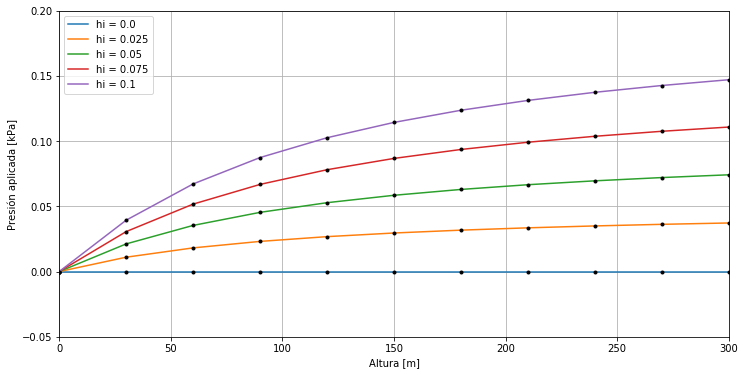

In [47]:
plt.figure(figsize=(12,6))
for j in range(len(hi)):
    plt.plot(pg,dh[:,j],label='hi = '+str(hi[j]))
    plt.plot(pg,dh[:,j],'.',color='k')
    
plt.grid()
plt.ylim(-0.05,0.2)
plt.xlim(0,300)
plt.legend()
plt.xlabel(u'Altura [m]')
plt.ylabel(u'Presión aplicada [kPa]')
plt.show()

## 4.

Un tanque abierto rectangular contiene un líquido en suspensión que en un tiempo dado tiene un peso específico que varía aproximadamente con la altura de acuerdo a los siguientes datos:

<img src="FigurasEjercicios/2_4.png">
<img src="FigurasEjercicios/2_4_1.png">

La profundidad $h=0$, corresponde a la superficie libre. Determine por integración numérica, la magnitud y localización de la fuerza resultante que el líquido en suspensión ejerce sobre un muro vertical en un tanque que tiene 6 metros de ancho. La profundidad del fluido en el tanque es de 3.6 m.

#### Desarrollo

La magnitud de la fuerza ejercida por el fluido $F_{R}$, puede ser encontrada sumando las fuerzas diferenciales actuando en la horizontal, como se muestra en la figura.

<img src="FigurasEjercicios/2_4_2.png">

La fuerza resultante se puede expresar entonces como:

\begin{equation}
    F_{R} = \int_{0}^{H} dF_{R} = b \int_{0}^{H} p \, dh
\end{equation}

Donde p es la presión a una profundidad h.

Para encontrar p, usamos:

\begin{equation}
    \frac{dp}{dz} = -\gamma
\end{equation}

y con $dz = -dh$,

\begin{equation}
    p(h) = \int_{0}^{h} \gamma \, dh
\end{equation}

In [48]:
#definimos el perfil de presiones como
gamma=np.array([10,10.1,10.2,10.6,11.3,12.3,12.7,12.9,13.0,13.1])
h=np.arange(0,3.7,0.4)
presion = []
print u'h [m], presión [kPa]'
for i in range(len(gamma)):
    presion.append(np.trapz(gamma[:i+1],h[:i+1]))
    print str(h[i]),', ', str(np.trapz(gamma[:i+1],h[:i+1]))
    
presion = np.array(presion)

h [m], presión [kPa]
0.0 ,  0.0
0.4 ,  4.02
0.8 ,  8.08
1.2 ,  12.24
1.6 ,  16.62
2.0 ,  21.34
2.4 ,  26.34
2.8 ,  31.46
3.2 ,  36.64
3.6 ,  41.86


In [49]:
# Luego, integrando el arreglo de presiones, y multiplicando por el ancho tenemos:
print 'La fuerza resultante es:'
FuerzaR = np.trapz(presion,h)*6
print str(FuerzaR)+' kN'

La fuerza resultante es:
426.408 kN


Ahora, para localizar el punto de aplicación de la fuerza resultante $F_{R}$,  se realiza la sumatoria de momentos sobre el eje formado por la intersección del muro vertical y la superficie del fluido, de la siguiente manera:

\begin{equation}
    F_{R}h_{r} = b \int_{0}^{h} h \, p \, dh
\end{equation}

In [50]:
#La integral anterior se obtiene como:

# Luego, integrando el arreglo de presiones, y multiplicando por el ancho tenemos:
print 'El valor de la integral es:'
Integral = np.trapz(presion*h,h)
print str(Integral)+' kN'

El valor de la integral es:
174.3728 kN


Multiplicando por el ancho, y dividiendo por la fuerza resultante queda:

In [51]:
print 'La fuerza resultante actúa a una profundidad de: '
hr = Integral*6/ FuerzaR
print str(hr)+' m.' 

La fuerza resultante actúa a una profundidad de: 
2.45360499803 m.


# Ecuación de Bernoulli

## 1.

Agua fluye alrededor de una curva bidimensional con líneas de corriente circulares, como se muestra en la figura a continuación. La presión en el punto (1) se mide y esde $p_{1} = 25 psi$, y la velocidad a través de la sección $a-a$ se indica en la tabla. Calcule u grafique la presión a través de la sección $a-a$ del canal [$p=p(z)\, para \, 0 \leq z \leq 2 ft.$]

<img src="FigurasEjercicios/3_1.png">

<img src="FigurasEjercicios/3_1_2.png">

#### Desarrollo

Se tiene lo siguiente:

\begin{equation}
    -\gamma \frac{dZ}{dn}-\frac{\partial p}{\partial n} = \frac{\rho V^{2}}{R}
\end{equation}

Con $\frac{dz}{dn}$ = 1, $R = 22 - n$, y $V = V(n)$, como se da en la tabla,

Así, 

\begin{equation}
    \frac{dp}{dn} = -\gamma - \frac{\rho V^{2}}{22-n}
\end{equation}

Se plantea la integral, 

\begin{equation}
    \int_{p}^{p1} dp = - \int_{n}^{n=2} \gamma dn - \int_{n}^{n=2} \frac{\rho V^{2}}{22-n} dn
\end{equation}

Integrando, 

\begin{equation}
    p_{1}-p = - \gamma (2-n) - \rho \int_{n}^{n=2} \frac{\rho V^{2}}{(22-n)} dn
\end{equation}

Así con, $\gamma = 62.4 \frac{lb}{ft^{3}}$, $\rho = 1.94 \frac{slugs}{ft^{3}}$, y $p_{1}=25 \frac{lb}{in^{2}}=3600 \frac{lb}{ft^{2}}$:

\begin{equation}
    p = 3600 + 62.4 (2-n)+1.94 \int_{n}^{2} \frac{V^{2}}{22-n} dn
\end{equation}

Así, se resuelve lo anterior para cada altura o posición n.

In [52]:
# Datos de la tabla

V = np.array([0,8,14.3,20,19.5,15.6,8.3,6.2,3.7,2.0,0])
z = np.array([0,0.2,0.3,0.6,0.8,1,1.2,1.4,1.6,1.8,2])

#y es la expresión dentro de la integral
x = z
y = V**2/(22-x)

In [53]:
int_i = []
for i in range(len(x)):
    int_i.append(np.trapz(y[i:],x[i:]))
int_i = np.array(int_i)

In [54]:
print 'Los valores de la integral para cada n son:'
print 'n, integral'
for i in range(len(int_i)):
    print x[i], int_i[i]

Los valores de la integral para cada n son:
n, integral
0.0 14.1123704425
0.2 13.8187924609
0.3 13.2008283549
0.6 8.98356469148
0.8 5.32077373751
1.0 2.36828451918
1.2 0.878225453243
1.4 0.360421588418
1.6 0.106711803533
1.8 0.019801980198
2.0 0.0


In [55]:
# La presión en cada punto, se calcula entonces como:

presion = 3600 + 62.4*(2-x) + 1.94*int_i

In [56]:
print 'Los valores de la presión para cada n son:'
print 'n [ft] // presión [lb/ft2]'
for i in range(len(int_i)):
    print str(x[i]), '//',str(presion[i])

Los valores de la presión para cada n son:
n [ft] // presión [lb/ft2]
0.0 // 3752.17799866
0.2 // 3739.12845737
0.3 // 3731.68960701
0.6 // 3704.7881155
0.8 // 3685.20230105
1.0 // 3666.99447197
1.2 // 3651.62375738
1.4 // 3638.13921788
1.6 // 3625.1670209
1.8 // 3612.51841584
2.0 // 3600.0


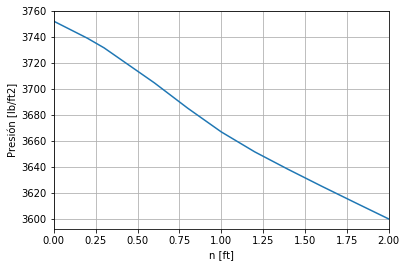

In [57]:
plt.plot(x,presion)
plt.grid()
plt.ylabel(u'Presión [lb/ft2]')
plt.xlabel(u'n [ft]')
plt.xlim(0,2)
plt.show()

## 2.

Fluye agua desde una tubería de 20mm de diámetro con un caudal $Q$ como se muestra en la figura. Calcule y grafique el diámetro $d$ en función de la distancia por debajo del grifo $h$, para valores de $0 \leq h \leq 1m$, y $0 \leq Q \leq 0.004 m^{3}/s$. 

<img src="FigurasEjercicios/3_2.png">

#### Desarrollo

Con la ecuación de Bernoulli entre (1) y (2), se tiene:

\begin{equation}
    \frac{p_{1}}{\gamma}+\frac{V_{1}^{2}}{2g}+Z_{1}=\frac{p_{2}}{\gamma}+\frac{V_{2}^{2}}{2g}+Z_{2}
\end{equation}

donde $p_{1}=p_{2}=0$, $z_{1} = h$, y $z_{2}=0$. Así, 

\begin{equation}
    V_{2}= (V_{1}^{2}+2gh)^{1/2}
\end{equation}

Donde $V_{1} = Q/A_{1}$

In [58]:
print 1/(np.pi*(0.25)*(0.02**2))

3183.09886184


$V_{1} = 3183.1 Q [m/s]$ con Q en $m^{3}/s$

Con $V_{2} = Q/A_{2} = \frac{4Q}{\pi d^{2}}$, de esta manera:

\begin{equation}
    \frac{4Q}{\pi d^{2}} = ((3183 Q)^2+2(9.81)h)^{1/2}
\end{equation}

Despejando d, 

\begin{equation}
    d = \frac{2\sqrt{Q}}{\sqrt{\pi} \, (1.013x10^{7} Q^{2}+19.62h)^{1/4}}
\end{equation}


In [59]:
# Se calcula para los caudales contenidos en Q:

Q = np.arange(0,0.005,0.001)

# Y para las h:

h= np.arange(0,1.1,0.1)

#arreglo contenedor de diámetros:

d = np.zeros([len(Q),len(h)])
for qi in range(len(Q)):
    print '//////////////////// Caudal = '+str(Q[qi])+' [m3/s] //////////////////////////////'
    print 'h [m] // d [m]'
    for hi in range(len(h)):
        d[qi,hi] = (2*(Q[qi]**0.5))/((np.pi**0.5)*((1.013*(10**7)*(Q[qi]**2)+19.62*h[hi])**0.25))
        print str(hi) + ' // ' + str(d[qi,hi])


//////////////////// Caudal = 0.0 [m3/s] //////////////////////////////
h [m] // d [m]
0 // nan
1 // 0.0
2 // 0.0
3 // 0.0
4 // 0.0
5 // 0.0
6 // 0.0
7 // 0.0
8 // 0.0
9 // 0.0
10 // 0.0
//////////////////// Caudal = 0.001 [m3/s] //////////////////////////////
h [m] // d [m]
0 // 0.0200010455075
1 // 0.0191350906814
2 // 0.0184291401178
3 // 0.0178367836368
4 // 0.0173288489166
5 // 0.0168858828073
6 // 0.0164943085974
7 // 0.016144301116
8 // 0.0158285368869
9 // 0.0155414214152
10 // 0.0152785914077
//////////////////// Caudal = 0.002 [m3/s] //////////////////////////////
h [m] // d [m]
0 // 0.0200010455075
1 // 0.0197660012502
2 // 0.0195441493367
3 // 0.0193342140877
4 // 0.0191350906814
5 // 0.0189458164095
6 // 0.0187655476813
7 // 0.0185935414547
8 // 0.0184291401178
9 // 0.0182717590822
10 // 0.0181208765291
//////////////////// Caudal = 0.003 [m3/s] //////////////////////////////
h [m] // d [m]
0 // 0.0200010455075
1 // 0.0198948630665
2 // 0.0197914406225
3 // 0.0196906516697

/home/jsperezc/.local/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


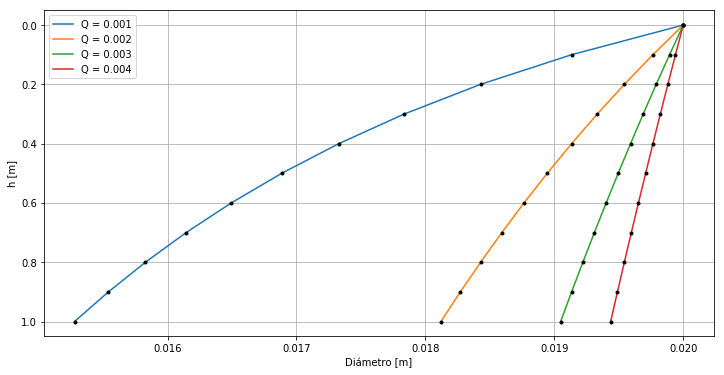

In [60]:
plt.figure(figsize=(12,6))

for j in range(1,len(Q)):
    plt.plot(d[j],h,label='Q = '+str(Q[j]))
    plt.plot(d[j],h,'.',color='k')
    
plt.grid()
# plt.ylim(-0.05,0.2)
# plt.xlim(0,300)
plt.legend()
plt.gca().invert_yaxis()
plt.xlabel(u'Diámetro [m]')
plt.ylabel(u'h [m]')
plt.show()

## 3.

Agua fluye desde un gran tanque a través de una tubería de área variable como se muestra en la figura. El área de la tubería está dada por $A = A_{0} [1-x(1-\frac{x}{l})/2l]$, donde $A_{0}$ es el área en el inicio $(x=0)$ y en el final $(x=l)$ del tubo. Calcule y grafique la presión dentro de la tubería en función de la distancia a lo largo de la misma para profundidades $h= 1, 4, 10 y 25 m$.

<img src="FigurasEjercicios/3_3.png">

#### Desarrollo

Con la ecuación de Bernoulli entre (1) y (2), se tiene:

\begin{equation}
    \frac{p_{1}}{\gamma}+\frac{V_{1}^{2}}{2g}+Z_{1}=\frac{p_{2}}{\gamma}+\frac{V_{2}^{2}}{2g}+Z_{2}
\end{equation}

donde $p_{1}=p_{2}=0$, $z_{1} = h$, $z_{2}=0$ y $V_{1} = 0$. Así, 

\begin{equation}
    V_{2}= (2gh)^{1/2}
\end{equation}

También en cualquier x, $AV = A_{2}V_{2}$, entonces con $A_{2}=A_{0}$, 

\begin{equation}
    V=\frac{A_{0}}{A} V_{2}
\end{equation}

Y, $\frac{p_{1}}{\gamma}+\frac{V_{1}^{2}}{2g}+Z_{1}=\frac{p}{\gamma}+\frac{V^{2}}{2g}+Z$. Despejando p, se tiene:

\begin{equation}
    p=\gamma h - \frac{1}{2} \rho V^{2} = \gamma h - \frac{1}{2} \rho (\frac{A_{0}}{A}))^{2} (2gh)
\end{equation}

\begin{equation}
    p=\gamma h [1-(\frac{A_{0}}{A})^{2}] = \gamma h (1-\frac{1}{(1- \frac{x}{2l}(1-\frac{x}{l}))^{2}})
\end{equation}

Se calcula $p$ para $0 \leq \frac{x}{l} \leq 1$, para las diferentes $h$.

In [61]:
x_l = np.arange(0,1.1,0.1)
h = np.array([1,4,10,25])

In [62]:
presion = np.zeros([len(h),len(x_l)])
for hi in range(len(h)):
    print '//////////////////// hi = '+str(h[hi])+' [m] //////////////////////////////'
    print 'x/l // presion [kPa]'
    for xi in range(len(x_l)):
        presion[hi,xi]=9.8*h[hi]*(1-((1)/((1-((x_l[xi]/2)*(1-x_l[xi])))**2)))
        print str(x_l[xi]) + ' // ' + str(presion[hi,xi])

//////////////////// hi = 1 [m] //////////////////////////////
x/l // presion [kPa]
0.0 // 0.0
0.1 // -0.945319481374
0.2 // -1.77844990548
0.3 // -2.43432477139
0.4 // -2.85495867769
0.5 // -3.0
0.6 // -2.85495867769
0.7 // -2.43432477139
0.8 // -1.77844990548
0.9 // -0.945319481374
1.0 // 0.0
//////////////////// hi = 4 [m] //////////////////////////////
x/l // presion [kPa]
0.0 // 0.0
0.1 // -3.7812779255
0.2 // -7.11379962193
0.3 // -9.73729908555
0.4 // -11.4198347107
0.5 // -12.0
0.6 // -11.4198347107
0.7 // -9.73729908555
0.8 // -7.11379962193
0.9 // -3.7812779255
1.0 // 0.0
//////////////////// hi = 10 [m] //////////////////////////////
x/l // presion [kPa]
0.0 // 0.0
0.1 // -9.45319481374
0.2 // -17.7844990548
0.3 // -24.3432477139
0.4 // -28.5495867769
0.5 // -30.0
0.6 // -28.5495867769
0.7 // -24.3432477139
0.8 // -17.7844990548
0.9 // -9.45319481374
1.0 // 0.0
//////////////////// hi = 25 [m] //////////////////////////////
x/l // presion [kPa]
0.0 // 0.0
0.1 // -23.63298703

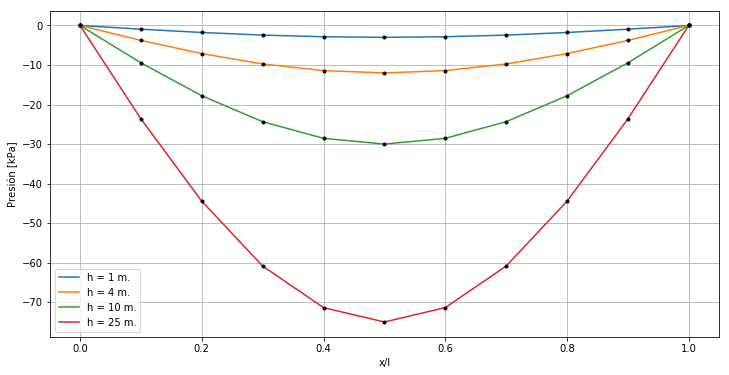

In [63]:
plt.figure(figsize=(12,6))

for j in range(len(h)):
    plt.plot(x_l,presion[j],label='h = '+str(h[j])+' m.')
    plt.plot(x_l,presion[j],'.',color='k')
    
plt.grid()
# plt.ylim(-0.05,0.2)
# plt.xlim(0,300)
plt.legend()
# plt.gca().invert_yaxis()
plt.xlabel(u'x/l')
plt.ylabel(u'Presión [kPa]')
plt.show()

## 4.

Agua fluye sobre una rampa como se muestra en la figura, con pérdidas viscosas despreciables. La profundidad y velocidad se mantienen en $h_{1} = 0.3m$ y $V_{1} = 6 m/s$. Calcule y plotee la profundidad aguas abajo $h_{2}$ en función de la altura de la rampa H, para $0 \leq H \leq 2 m$. Note que para cada valor de H hay tres soluciones, no todas son realistas.

<img src="FigurasEjercicios/3_4.png">

#### Desarrollo

Con la ecuación de Bernoulli entre (1) y (2), se tiene:

\begin{equation}
    \frac{p_{1}}{\gamma}+\frac{V_{1}^{2}}{2g}+Z_{1}=\frac{p_{2}}{\gamma}+\frac{V_{2}^{2}}{2g}+Z_{2}
\end{equation}

Donde $p_{1}=0$, $p_{2}=0$, $z_{1}=0.3m$ y $z_{2}=H+h_{2}$

Por continuidad, 

\begin{equation}
    A_{1} V_{1} = A_{2} V_{2}
\end{equation}

\begin{equation}
    V_{2} = \frac{A_{1}}{A_{2}} V_{1} = \frac{1.2}{h_{2}}
\end{equation}

Reemplazando en la ecuación de Bernoulli, se tiene:

\begin{equation}
    h_{2}^{3} - (2.135 - H)h_{2}^{2}+0.1651 = 0
\end{equation}

Esta ecuación se resuelve para $0 \leq H \leq 2 m$, despejando $h_{2}$.

In [64]:
# con numpy.roots se pueden calcular las raices de un polinomio de cualquier orden,
# si se dan los coeficientes.

#por ejemplo, con H = 0.2m y x=h2, queda una ecuación de la forma 
# 1 x³ - 1.935 x² + 0.1651 = 0 se obtiene:

coefs = [1,-1.935,0,0.1651]
print np.roots(coefs)

[ 1.88871792  0.31970352 -0.27342144]


In [65]:
#Ahora se calculan las raices de la ecuación para distintos H

H = np.arange(0,2,0.015)

Roots = [] #Es una lista de que va a contener una lista de raices para cada H.
for hi in range(len(H)):
    coefs = [1,-(2.135-H[hi]),0,0.1651]
    raices = np.roots(coefs)
    raices=raices[(raices>0)&(np.isreal(raices)==True)] ## Solo tomamos las raices
    Roots.append(raices)
    #positivas y reales
    print 'H = '+str(H[hi])+' m. Las raices positivas y reales son:'
    print raices

H = 0.0 m. Las raices positivas y reales son:
[ 2.09747206  0.29995054]
H = 0.015 m. Las raices positivas y reales son:
[ 2.08190889  0.30129536]
H = 0.03 m. Las raices positivas y reales son:
[ 2.06633245  0.30266011]
H = 0.045 m. Las raices positivas y reales son:
[ 2.0507423   0.30404532]
H = 0.06 m. Las raices positivas y reales son:
[ 2.03513798  0.30545153]
H = 0.075 m. Las raices positivas y reales son:
[ 2.019519    0.30687933]
H = 0.09 m. Las raices positivas y reales son:
[ 2.00388488  0.3083293 ]
H = 0.105 m. Las raices positivas y reales son:
[ 1.98823508  0.30980208]
H = 0.12 m. Las raices positivas y reales son:
[ 1.97256906  0.31129831]
H = 0.135 m. Las raices positivas y reales son:
[ 1.95688624  0.31281866]
H = 0.15 m. Las raices positivas y reales son:
[ 1.94118601  0.31436385]
H = 0.165 m. Las raices positivas y reales son:
[ 1.92546776  0.31593461]
H = 0.18 m. Las raices positivas y reales son:
[ 1.90973081  0.3175317 ]
H = 0.195 m. Las raices positivas y reales son

/usr/lib/python2.7/dist-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


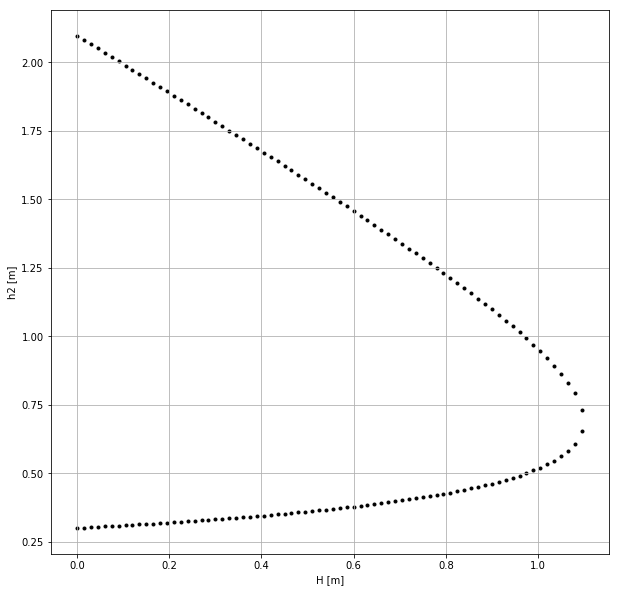

In [66]:
#Ahora ploteamos todos los puntos:

plt.figure(figsize=(10,10))
for i in range(len(H)):
    x= np.ones_like(Roots[i])*H[i] # array con valores repetidos para cada H de la longitud
    #del array de raices.
    plt.scatter(x,Roots[i],marker='.',color='k')
plt.ylabel('h2 [m]')
plt.xlabel('H [m]')
plt.grid()

Se observa que para valores de H mayores a 1.1 no existen raices reales positivas.

# Cinemática

## 1.

Fluye agua a través de una tubería con $\textbf{V} = u(t) \hat{\imath}$, las medidas aproximadas de $u(t)$ se muestran en la tabla. Calcule y gafique la aceleración en función del tiempo para $0 \leq t \leq 20s$. Calcule y grafique además la aceleración como función del tiempo si todos los valores de $u(t)$ se incrementan con un factor de 2, y por un factor de 5.

<img src="FigurasEjercicios/4_1.png">

#### Desarrollo

La aceleración total se define como:

\begin{equation}
    \vec{a} = \frac{\partial \vec{V}}{\partial t} + \vec{V} \cdot \nabla \vec{V}
\end{equation}

con $u=u(t)$, $v=0$ y $w=0$, se tiene:


\begin{equation}
    \vec{a} = (\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x})\hat{\imath} 
\end{equation}  

o 

\begin{equation}
    a_{x} =  \frac{\partial u}{\partial t}
\end{equation}  

In [67]:
#Creamos los arrays correspondientes a u y a t

In [68]:
t = np.array([0,1.8,3.1,4.0,5.5,6.9,8.1,10,11.2,12.3,13.9,15.0,16.4,17.5,18.4,20])
u = np.array([0,1.7,3.2,3.8,4.6,5.8,6.3,7.1,8.1,8.4,8.3,8.1,7.9,7,6.6,5.7])

In [71]:
# Para calcular la aceleración, restamos el vector de velocidad con sigo mismo, y 
#lo dividimos por la resta del vector de tiempo.

In [91]:
a = np.diff(u)/np.diff(t) ##ft/s2
print a
print '[ft/s2]'

[ 0.94444444  1.15384615  0.66666667  0.53333333  0.85714286  0.41666667
  0.42105263  0.83333333  0.27272727 -0.0625     -0.18181818 -0.14285714
 -0.81818182 -0.44444444 -0.5625    ]
[ft/s2]


In [76]:
#Ahora para u = 2u y u = 5u

u2=2*u
u5=5*u

a2=np.diff(u2)/np.diff(t)
a5=np.diff(u5)/np.diff(t)

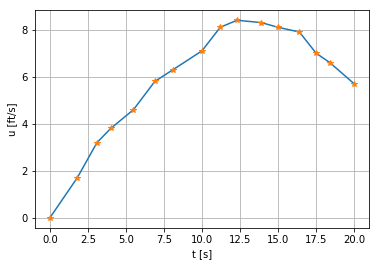

In [89]:

plt.plot(t,u)
plt.plot(t,u,'*')
plt.ylabel('u [ft/s]')
plt.xlabel('t [s]')

plt.grid()
plt.show()

Text(0.5,0,u't [s]')

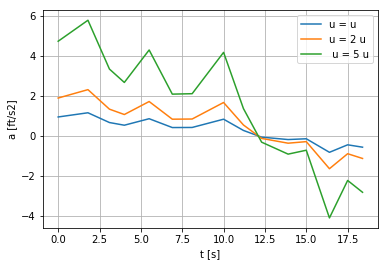

In [87]:
plt.plot(t[:-1],a,label = 'u = u')
plt.plot(t[:-1],a2,label = 'u = 2 u')
plt.plot(t[:-1],a5,label = ' u = 5 u')
plt.legend()
plt.grid()
plt.ylabel('a [ft/s2]')
plt.xlabel('t [s]')

## 2.

Como se indica en la figura, la velocidad en el exhosto de un carro varía con respecto al tiempo y la distancia a causa de la naturaleza periódica del funcionamiento del motor, y al efecto de amortiguamiento con la distancia desde el motor. Asuma que la velocidad destá dada por $V = V_{0}[1+ae^{-bx}sin(\omega t)]$, donde $V_{0} = 8 fps$, $a = 0.05$, $b = 0.2 ft^{-1}$ y $\omega = 50 rad/s$. Calcule y plotee la aceleración del fluido en x = 0,1,2,3,4 y 5 ft para $0 \leq t \leq \pi / 25 s$

<img src="FigurasEjercicios/4_2.png">

#### Desarrollo

Como $u = u(x,t)$, $v=0$, y $w=0$, entonces se tiene:

\begin{equation}
    \vec{a} = (\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x})\hat{\imath} 
\end{equation}  


Entonces, con $u = V_{0}[1+ae^{-bx}sin(\omega t)]$, se obtiene lo siguiente:

\begin{equation}
    a_{x} = V_{0} a e^{-bx} [\omega cos(\omega t)-V_{0}b sin(\omega t)(1+ae^{-bx}sin(\omega t))]
\end{equation}  

Con $V_{0}=8 ft/s$, $a=0.05$, $b=0.2 1/ft$, y $\omega = 50 rad/s$, se tiene:

\begin{equation}
    a_{x} = 0.4 e^{-0.2x} [50 cos(50 t)-1.6 sin(50 t)(1+0.05e^{-0.2x}sin(50 t))]
\end{equation}



In [98]:
#Creamos los arreglos correspondientes a x y a t

x = np.array([0,1,2,3,4,5])
t=np.arange(0,np.pi/25.,0.01)

ax = np.zeros([len(x),len(t)])
print 'Las aceleraciones para cada x son: '


for xi in range(len(x)):
    print '------------------------------------ x = '+str(x[xi])+' ft ------------------------------------'
    print 't [s]:'
    print t
    ax[xi,:]=0.4*np.e**(-0.2*x[xi])* \
    (50*np.cos(50*t)-1.6*np.sin(50*t)*(1+0.05*np.e**(-0.2*x[xi])*np.sin(50*t)))
    print 'ax [ft/s2]:'
    print ax[xi]

Las aceleraciones para cada x son: 
------------------------------------ x = 0 ft ------------------------------------
t [s]:
[ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12]
ax [ft/s2]:
[ 20.          17.23746373  10.24484634   0.74450736  -8.93134538
 -16.41735589 -19.89080401 -18.50857004 -12.60684682  -3.6208748
   6.2575301   14.60901211  19.37973332]
------------------------------------ x = 1 ft ------------------------------------
t [s]:
[ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12]
ax [ft/s2]:
[ 16.37461506  14.11393325   8.3911335    0.61427645  -7.30844044
 -13.43969315 -16.28511837 -15.15295111 -10.31889312  -2.95998343
   5.12759934  11.96321154  15.86715443]
------------------------------------ x = 2 ft ------------------------------------
t [s]:
[ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12]
ax [ft/s2]:
[ 13.40640092  11.55624291   6.87233316   0.50609454  -5.9810128
 -11.

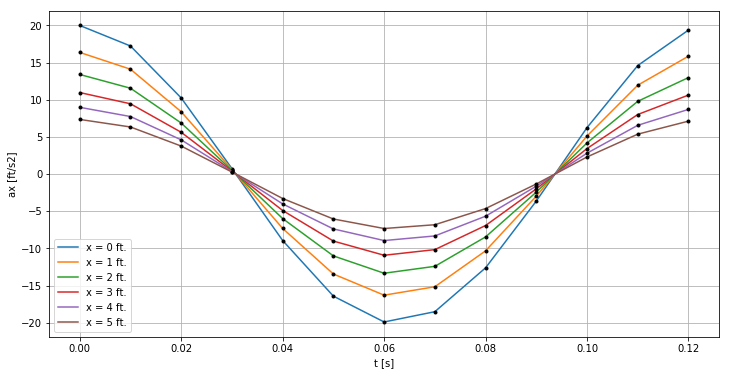

In [100]:
plt.figure(figsize=(12,6))

for xi in range(len(x)):
    plt.plot(t,ax[xi],label='x = '+str(x[xi])+' ft.')
    plt.plot(t,ax[xi],'.',color='k')
    
plt.grid()
# plt.ylim(-0.05,0.2)
# plt.xlim(0,300)
plt.legend()
# plt.gca().invert_yaxis()
plt.ylabel(u'ax [ft/s2]')
plt.xlabel(u't [s]')
plt.show()

## 3.

Se tiene un campo de velocidad en x y en y definido por,

\begin{equation}
    u = \frac{(x^{2}-2xy+y)sin(\pi x/100)}{1000} sin(\frac{\pi (t+1)}{10})
\end{equation}

\begin{equation}
    v = \frac{(x^{-2}-xy/100+y/2)}{10} sin(\frac{\pi (t-1)}{10})
\end{equation}

Con x y y en metros, t en segundos, u y v en $m/s$.

- Grafique el campo de velocidades, para $t=2s$ (mostrando magnitud y dirección)
- Grafique las lineas de corriente para $t=2s$
- Calcule y grafique las aceleraciones local y advectiva, cuáles son los valores para x=50m, y=50m, t=2s
- Calcule y grafique la trayectoria para las partículas/parcelas iniciando en t=0, y terminando en t=20, con sus puntos iniciales sobre la línea x=y.

#### Desarrollo

Se definen los arrays x, y, t

In [163]:
x = np.arange(0,101,1).astype(float)
y = np.arange(0,101,1).astype(float)

In [164]:
t = np.arange(0,20)

In [165]:
## Creamos una malla de pares x, y, con el fin de posteriormente definir para cada punto de la malla 
## el campo de velocidades.

xx,yy=np.meshgrid(x,y)

Calculamos el campo de velocidades para todas las posiciones (x,y) y todos los tiempos t.

In [166]:
# Creamos arrays de 3 dimensiones (t,y,x)

U = np.zeros([len(t),len(y),len(x)])
V = np.zeros([len(t),len(y),len(x)])

#iteramos en el tiempo


for ti in range(len(t)):
    U[ti] = ((xx**2-(2*yy*xx)+yy)*np.sin(np.pi*xx/100)/1000.)*np.sin(np.pi*(t[ti]+1)/10)
    V[ti] = (xx**-2-(yy*xx/100)+yy*0.5)/10.*np.sin(np.pi*(t[ti]-1)/10)

/home/jsperezc/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in power
  # This is added back by InteractiveShellApp.init_path()
/home/jsperezc/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


Encontramos la posición en la que t=2,

In [170]:
posi_t = np.where(t==2)[0][0]

Graficamos entonces para t=2

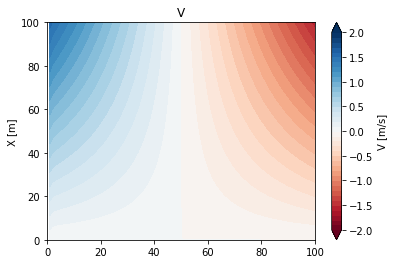

In [225]:
salto=10
intervalos=41
mini=-2
maxi=2
bounds=np.linspace(mini,maxi,intervalos)
cs = plt.contourf(xx,yy,V[posi_t],cmap='RdBu' ,vmin=mini,vmax=maxi, levels=bounds, extend='both',zorder=0)
plt.ylabel('Y [m]')
plt.ylabel('X [m]')

cbar = plt.colorbar()
cbar.set_label(u'V [m/s]')
plt.title('V')
plt.show()

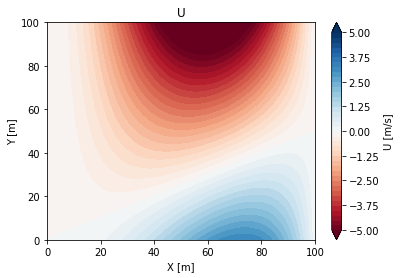

In [224]:
salto=10
intervalos=41
mini=-5
maxi=5
bounds=np.linspace(mini,maxi,intervalos)
cs = plt.contourf(xx,yy,U[posi_t],cmap='RdBu' ,vmin=mini,vmax=maxi, levels=bounds, extend='both',zorder=0)
plt.ylabel('Y [m]')
plt.xlabel('X [m]')

cbar = plt.colorbar()
cbar.set_label(u'U [m/s]')
plt.title('U')
plt.show()

La magintud de la velocidad es 

In [200]:
mag = np.sqrt(U**2+V**2)

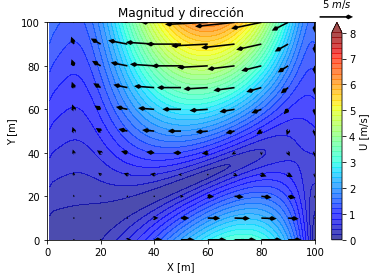

In [243]:
salto=10
intervalos=41
mini=0
maxi=8
bounds=np.linspace(mini,maxi,intervalos)
cs = plt.contourf(xx,yy,mag[posi_t],cmap='jet' ,vmin=mini,vmax=maxi, levels=bounds, extend='max',zorder=0,alpha=0.7)
plt.ylabel('Y [m]')
# plt.grid()
plt.xlabel('X [m]')
Q = plt.quiver(xx[::salto,::salto],yy[::salto,::salto], U[posi_t][::salto,::salto],(V[posi_t][::salto,::salto]),scale=40, width=0.0060, headlength=3)
plt.quiverkey(Q, 1.08, 1.025, 5, '5 $m/s$')

cbar = plt.colorbar(cs)
cbar.set_label(u'U [m/s]')
plt.title(u'Magnitud y dirección')
plt.show()

Ploteamos las lineas de corriente para t=2, con la magnitud de la velocidad.

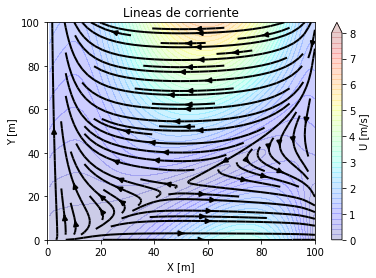

In [244]:
salto=10
intervalos=41
mini=0
maxi=8
bounds=np.linspace(mini,maxi,intervalos)
cs = plt.contourf(xx,yy,mag[posi_t],cmap='jet' ,vmin=mini,vmax=maxi, levels=bounds, extend='max',zorder=0,alpha=0.2)
plt.ylabel('Y [m]')
# plt.grid()
plt.xlabel('X [m]')
plt.ylim(0,100)
plt.streamplot(x, y, U[posi_t], V[posi_t], linewidth=2, color='k')

cbar = plt.colorbar(cs)
cbar.set_label(u'U [m/s]')
plt.title(u'Lineas de corriente')
plt.show()

Calculamos la aceleración local y advectiva en cada componente, y graficamos para t=2s

Aceleración local en x,

\begin{equation}
    a_{lx} = \frac{\partial u}{\partial t} 
\end{equation}  

Aceleración local en y,

\begin{equation}
    a_{ly} = \frac{\partial v}{\partial t} 
\end{equation}  

Aceleración advectiva en x,

\begin{equation}
    a_{ax} = u \frac{\partial u}{\partial x} 
\end{equation}

Aceleración advectiva en y,

\begin{equation}
    a_{ay} = v \frac{\partial v}{\partial y} 
\end{equation}

Para cada componente entonces, tenemos

\begin{equation}
    a_{lx} = \frac{\partial u}{\partial t} 
\end{equation} 

In [269]:
dx = 1.
dy = 1.
dt = 1.

In [270]:
alx = np.diff(U,axis=0)/dt

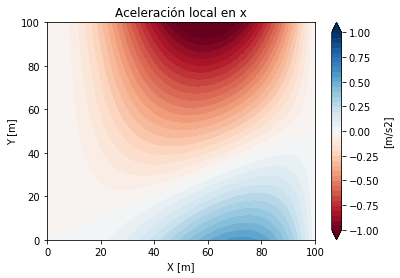

In [271]:
salto=10
intervalos=41
mini=-1
maxi=1
bounds=np.linspace(mini,maxi,intervalos)
cs = plt.contourf(xx,yy,alx[posi_t],cmap='RdBu' ,vmin=mini,vmax=maxi, levels=bounds, extend='both',zorder=0)
plt.ylabel('Y [m]')
plt.xlabel('X [m]')

cbar = plt.colorbar()
cbar.set_label(u'[m/s2]')
plt.title(u'Aceleración local en x')
plt.show()

In [272]:
# Buscamos las posiciones x=50, y=50 y t= 2

donde_x = np.where(x==50)[0][0]
donde_y = np.where(y==50)[0][0]
donde_t = np.where(t==2)[0][0]

In [273]:
print 'La aceleración local en x para x=50, y=50, t=2 es: '
print alx[donde_t,donde_y,donde_x]
print '[m/s2]'

La aceleración local en x para x=50, y=50, t=2 es: 
-0.347996828705
[m/s2]


\begin{equation}
    a_{ly} = \frac{\partial v}{\partial t} 
\end{equation} 

In [283]:
aly = np.diff(V,axis=0)/dt

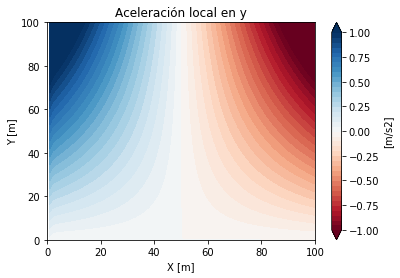

In [284]:
salto=10
intervalos=41
mini=-1
maxi=1
bounds=np.linspace(mini,maxi,intervalos)
cs = plt.contourf(xx,yy,aly[posi_t],cmap='RdBu' ,vmin=mini,vmax=maxi, levels=bounds, extend='both',zorder=0)
plt.ylabel('Y [m]')
plt.xlabel('X [m]')

cbar = plt.colorbar()
cbar.set_label(u'[m/s2]')
plt.title(u'Aceleración local en y')
plt.show()

In [285]:
print 'La aceleración local en y para x=50, y=50, t=2 es: '
print aly[donde_t,donde_y,donde_x]
print '[m/s2]'

La aceleración local en y para x=50, y=50, t=2 es: 
1.11507303167e-05
[m/s2]


\begin{equation}
    a_{ax} = u \frac{\partial u}{\partial x} 
\end{equation} 

In [290]:
aax = U[:,:,:-1]*np.diff(U,axis=2)/dx

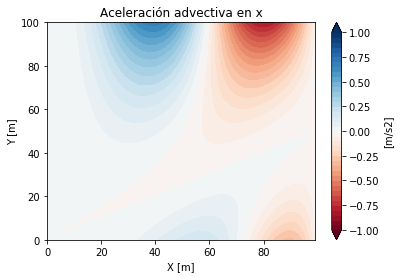

In [291]:
salto=10
intervalos=41
mini=-1
maxi=1
bounds=np.linspace(mini,maxi,intervalos)
cs = plt.contourf(xx[:,:-1],yy[:,:-1],aax[posi_t],cmap='RdBu' ,vmin=mini,vmax=maxi, levels=bounds, extend='both',zorder=0)
plt.ylabel('Y [m]')
plt.xlabel('X [m]')

cbar = plt.colorbar()
cbar.set_label(u'[m/s2]')
plt.title(u'Aceleración advectiva en x')
plt.show()

In [293]:
print 'La aceleración advectiva en x para x=50, y=50, t=2 es: '
print aax[donde_t,donde_y,donde_x]
print '[m/s2]'

La aceleración advectiva en x para x=50, y=50, t=2 es: 
-0.003541324567
[m/s2]


\begin{equation}
    a_{ay} = v \frac{\partial v}{\partial y} 
\end{equation} 

In [295]:
aay = V[:,:-1,:]*np.diff(V,axis=1)/dy

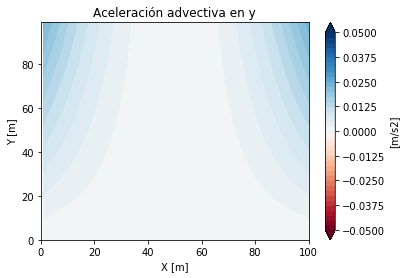

In [303]:
salto=10
intervalos=41
mini=-0.05
maxi=0.05
bounds=np.linspace(mini,maxi,intervalos)
cs = plt.contourf(xx[:-1,:],yy[:-1,:],aay[posi_t],cmap='RdBu' ,vmin=mini,vmax=maxi, levels=bounds, extend='both',zorder=0)
plt.ylabel('Y [m]')
plt.xlabel('X [m]')

cbar = plt.colorbar()
cbar.set_label(u'[m/s2]')
plt.title(u'Aceleración advectiva en y')
plt.show()

In [304]:
print 'La aceleración advectiva en y para x=50, y=50, t=2 es: '
print aay[donde_t,donde_y,donde_x]
print '[m/s2]'

La aceleración advectiva en y para x=50, y=50, t=2 es: 
0.0
[m/s2]


Cálculo de las trayectorias.

In [322]:
# inicialmente, definimos una función para buscar la velocidad en un punto en el espacio-tiempo

#con esta función encontramos el punto más cercano en una malla x y y
def find_nearest_2D(Y_Mesh,X_Mesh,y,x):
    
    diff_Y=abs(Y_Mesh-y)
    diff_X=abs(X_Mesh-x)

    return np.where((diff_Y==np.nanmin(diff_Y))&(diff_X==np.nanmin(diff_X)))

# Con esta función se obtiene la velocidad en un punto, se ingresan los arreglos U, V, la malla de X, 
# la malla de Y, y las posiciones y y x. 

def obt_vel(Ut,Vt,X_Mesh,Y_Mesh,y,x):
    posixy = find_nearest_2D(X_Mesh,Y_Mesh,y,x)
    return Ut[posixy][0],Vt[posixy][0]

In [339]:
# Pondemos puntos iniciales en x=y para x=10,20,30,40,50,60,70,80 y 90

pix = np.arange(10,100,10)
piy = pix


#Creamos listas que van a contener todos los puntos en x y en y de las trayectorias para cada punto inicial.
trayectoriasx = [] 
trayectoriasy = [] 
# iteramos en todos los puntos iniciales
for pi in range(len(pix)):
    
    print '-------------------Trayectoria con puntos iniciales en x = '+str(pix[pi])+'m, y = '+str(piy[pi])+'m.------------'
    
    trayectoria_tempx = []
    trayectoria_tempy = []
    
    trayectoria_tempx.append(pix[pi])
    trayectoria_tempy.append(piy[pi])
    utemp,vtemp = obt_vel(U[ti],V[ti],xx,yy,piy[pi],pix[pi])
    newx = pix[pi]
    newy = piy[pi]
    for ti in range(len(t)):
        
        print 't = '+str(t[ti])+' s.'
        print '       x = '+str(newx)+' m.'
        print '       y = '+str(newy)+' m.'
        

        utemp,vtemp = obt_vel(U[ti],V[ti],xx,yy,newx,newy)
#         print utemp,vtemp
        newx = trayectoria_tempx[ti]+utemp*dt
        newy = trayectoria_tempy[ti]+vtemp*dt
        trayectoria_tempx.append(newx)
        trayectoria_tempy.append(newy)
    trayectoriasx.append(trayectoria_tempx)
    trayectoriasy.append(trayectoria_tempy)

-------------------Trayectoria con puntos iniciales en x = 10m, y = 10m.------------
t = 0 s.
       x = 10 m.
       y = 10 m.
t = 1 s.
       x = 9.99140576475 m.
       y = 9.87608418526 m.
t = 2 s.
       x = 9.97505855787 m.
       y = 9.87608418526 m.
t = 3 s.
       x = 9.95255855787 m.
       y = 10.0 m.
t = 4 s.
       x = 9.92610822151 m.
       y = 10.2357018862 m.
t = 5 s.
       x = 9.89829669202 m.
       y = 10.5601177009 m.
t = 6 s.
       x = 9.86626239577 m.
       y = 10.9795336246 m.
t = 7 s.
       x = 9.83901239577 m.
       y = 11.4205336246 m.
t = 8 s.
       x = 9.81921411188 m.
       y = 11.8399495483 m.
t = 9 s.
       x = 9.80699119952 m.
       y = 12.2290867226 m.
t = 10 s.
       x = 9.80699119952 m.
       y = 12.5118114289 m.
t = 11 s.
       x = 9.82102845044 m.
       y = 12.672809283 m.
t = 12 s.
       x = 9.84772888834 m.
       y = 12.672809283 m.
t = 13 s.
       x = 9.88447888834 m.
       y = 12.5118114289 m.
t = 14 s.
       x = 9.92768110438

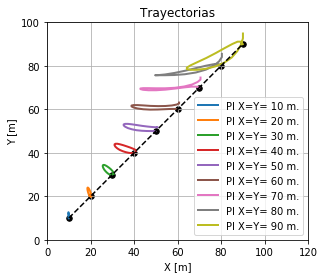

In [367]:
for i in range(len(trayectoriasx)):
    plt.plot(trayectoriasx[i],trayectoriasy[i],label='PI X=Y= '+str(pix[i])+' m.',lw=2)
    plt.scatter(trayectoriasx[i][0],trayectoriasy[i][0],marker='o',color='k',s=30)
    
    
plt.plot(pix,piy,'--',color='k')
plt.grid()
plt.title('Trayectorias')
plt.ylabel('Y [m]')
# plt.grid()
plt.xlabel('X [m]')
plt.xlim(0,120)
plt.ylim(0,100)
plt.axes().set_aspect('equal')
plt.legend()
plt.show()

# Análisis de volúmenes de control finitos.

## 1.

Para medir el flujo másico de aire a través de una tubería de 6 pulgadas de diámetro interno, la velocidad local es medida en diferentes radios desde el eje de la tubería. Determine el flujo másico correspondiente a los datos mostrados en la tabla.

<img src="FigurasEjercicios/5_1.png">

#### Desarrollo

El flujo másico es calculado como:

\begin{equation}
    \dot{m} = \int_{0}^{R} \, \rho \, u \, 2 \, \pi \, r \, dr
     =  2 \, \pi \, \rho \int_{0}^{R} \, u \, r \, dr
\end{equation} 

Donde $R = 3 in$, $\rho = 0.00238 slug/ft3$, $u = velocidad \, axial \, local \, [ft/s]$, $r = radio \, local \, [in]$.

In [371]:
# Se evalúa la integral para todos los intervalos.
u=np.array([30,29.71,29.39,29.06,28.7,28.31,27.89,27.42,26.9,26.32,25.64,24.84,23.84,22.5,20.38,18.45,16.71,14.66,0])
r=np.array([0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,2.9,2.95,2.98,3])
# np.trapz()

In [391]:
#Podemos integrar manualmente con la regla del trapezio
suma=0
for i in range(1,len(u)):
    suma=suma+(u[i-1]*r[i-1]+u[i]*r[i])*(r[i]-r[i-1])/2.

In [396]:
print 'La integral es igual a: '
print suma

La integral es igual a: 
109.700425


In [395]:
print 'O con numpy, la integral es igual a: '
inte = np.trapz(u*r,r)
print inte

O con numpy, la integral es igual a: 
109.700425


In [397]:
print 'De esa manera ,el flujo másico es:'
print suma*0.00238*2*np.pi
print 'slugs/s'

De esa manera ,el flujo másico es:
1.64045807455
slugs/s


## 2.

Se muestran los valores medidos del aumento en la cabeza total para aire fluyendo a través de un ventilador.

<img src="FigurasEjercicios/5_2.png">

Determine el caludal que resultaría cuando se conecta el ventilador a un sistema de tuberías cuyas pérdidas en cabeza total están dadas por $k_{l} Q^{2}$, cuando (a) $k_l=49 mm H_2O/(m^{3}/s)^{2}$, (b) $k_l=91 mm H_2O/(m^{3}/s)^{2}$ y (c) $k_l=140 mm H_2O/(m^{3}/s)^{2}$.

#### Desarrollo

El caudal de la combinación entre un ventilador o bomba conectada a un sistema de tuberías es determinado por la intersección  entre la curva de cabeza ventilador o bomba vs. el caudal, y la curva de pérdidas del sistema vs. el caudal. 

Para determinar el caudal resultante cuando el ventilador mencionado se conecta a los ramales (a), (b) y (c), se determinan las intersecciones mencionadas.

Inicialmente, se ajustan los datos de la tabla a un polinomio de orden 7 (puede ser de mayor o menor orden, para que se ajuste a los datos).

In [424]:
# Para la primera curva, x es el caudal Q, y y es el aumento en la cabeza HR.

x1 = np.array([0,0.14,0.28,0.42,0.57,0.71,0.85,0.99,1.13,1.27])
y1 = np.array([79,79,76,67,65,70,76,79,75,64])

Text(0.5,0,u'Caudal [m3/s]')

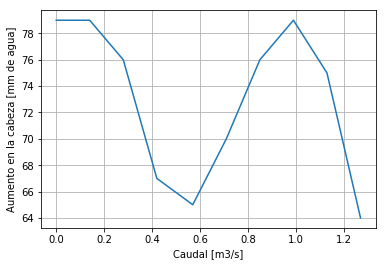

In [425]:
plt.plot(x1,y1)
plt.grid()
plt.ylabel('Aumento en la cabeza [mm de agua]')
plt.xlabel('Caudal [m3/s]')

In [426]:
#Los coeficientes del polinomio se hallan así:
orden = 7
coeficientes = np.polyfit(x1,y1,7)

print 'Los coeficientes del polinomio son: '
print coeficientes

Los coeficientes del polinomio son: 
[ -1736.919282     8262.04155394 -15351.27368581  13785.78679973
  -5951.94773656   1054.057373      -62.16795513     78.98059615]


In [427]:
def poly_eval(x,coeficientes):
    suma = 0
    for i in range(1,len(coeficientes)+1):
#         print len(coeficientes)-i
        suma = suma+(x**(len(coeficientes)-i))*coeficientes[i-1]
    return suma

In [435]:
x_test=np.arange(0,1.3,0.01)
y_test = np.array([poly_eval(x_test[i],coeficientes) for i in range(len(x_test))])

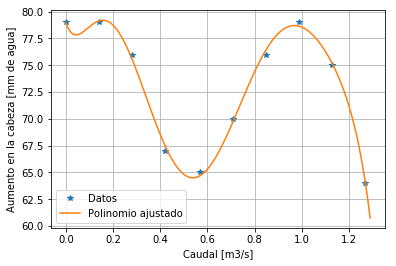

In [439]:


plt.plot(x1,y1,'*',label='Datos')
plt.plot(x_test,y_test,label='Polinomio ajustado')
plt.grid()
plt.ylabel('Aumento en la cabeza [mm de agua]')
plt.xlabel('Caudal [m3/s]')
plt.legend()
plt.show()

Ahora debemos encontrar la intersección entre dos funciones, para ello, igualamos el polinomio a la curva de pérdidas, así:

\begin{equation}
    c_{0}x^{0}+c_{1}x^{1}+...+c_{n}x^{n} - k_{l}x^{2} = 0
\end{equation}

Se encontrará el caudal a partir del método de Newton-Raphson, para ello, creamos inicialmente una función que contenga la expresión mostrada anteriormente.

In [440]:
def func_poly(x,coeficientes,k):
    return poly_eval(x,coeficientes)-k*(x**2)

In [458]:
#Calculo la derivada de la función en el punto x

def derivative(x,coeficientes,k): 
    h = 0.000001
    derivative = (func_poly(x+h,coeficientes,k) - func_poly(x,coeficientes,k)) / h
    return derivative

In [466]:
# Función que devuelve cada paso de la operación de Newton-Raphson

def newton_raphson(x,coeficientes,k):
    return (x - (func_poly(x,coeficientes,k) / derivative(x,coeficientes,k)))
 
#Función que itera n veces para encontrar la solución, con un valor de x inical de p

def iterate(p, n,coeficientes,k):
    x = p
    for _ in range(n):
        x = newton_raphson(x,coeficientes,k)
    return x

In [472]:
print("Para k = 49, el caudal es de  ",iterate(1, 1000,coeficientes,49),"m3/s")
print("y por lo tanto, la cabeza operativa es ",poly_eval(iterate(1, 1000,coeficientes,49),coeficientes),"mm de agua.")

('Para k = 49, el caudal es de  ', 1.2033934139360194, 'm3/s')
('y por lo tanto, la cabeza operativa es ', 70.959629726527169, 'mm de agua.')


In [473]:
print("Para k = 91, el caudal es de  ",iterate(1, 1000,coeficientes,91),"m3/s")
print("y por lo tanto, la cabeza operativa es ",poly_eval(iterate(1, 1000,coeficientes,91),coeficientes),"mm de agua.")

('Para k = 91, el caudal es de  ', 0.92845920538487914, 'm3/s')
('y por lo tanto, la cabeza operativa es ', 78.445321141815484, 'mm de agua.')


In [474]:
print("Para k = 140, el caudal es de  ",iterate(1, 1000,coeficientes,140),"m3/s")
print("y por lo tanto, la cabeza operativa es ",poly_eval(iterate(1, 1000,coeficientes,140),coeficientes),"mm de agua.")

('Para k = 140, el caudal es de  ', 0.70472050793158658, 'm3/s')
('y por lo tanto, la cabeza operativa es ', 69.528339201909475, 'mm de agua.')


# Análisis dimensional

## 1.

<img src="FigurasEjercicios/6_1.png">

El aumento en la presión, $\Delta p = p_{2}-p_{1}$, en una expansión como la que se muestra en la figura por la que pasa cierto fluido, puede ser expresada como:

\begin{equation}
    \Delta p =  f(A_{1},A_{2},\rho,V_{1})
\end{equation}

donde $A_{1}$ y $A_{2}$ son las áreas de las secciones transversales antes y después de a expansión respectivamente, $\rho$ es la densidad del fluido, $V_{1}$ es la velocidad corriente arriba de la expansión.

Se realizaron experimentos con $A_{2}=1.25 ft^{2}$, $V_{1}=5 ft/s$ y $\rho=1.94 slugs/ft^{3}$, los datos obtenidos se muestran en la tabla.

<img src="FigurasEjercicios/6_1_1.png">

Plotee los resultados de los test, usando parámetros adimensionales. Aproxime una curva para determinar una ecuación general para $\Delta p$ y use esta ecuación para predecir $\Delta p$ en agua fluyendo a través de una expansión abrupta con una relación de área $A_{1}/A_{2} = 0.35$, y un avelocidad $V_{1}=3.75 ft/s$

#### Desarrollo

Las dimensiones que tenemos son:

- $\Delta p = F L^{-2}$
- $A_{1} = L^{2}$
- $A_{2} = L^{2}$
- $\rho = FL^{-4}T^{2}$
- $V_{1} = LT^{-1}$

Del teorema pi, 5-3=2 son los términos pi adimensionales requeridos.

Por inspección, se encuentra el término (que contiene a $\Delta p$):

\begin{equation}
    \Pi_{1} = \frac{\Delta p}{\rho V_{1}^{2}} = \frac{FL^{-2}}{(FL^{-4}T^{2})(LT^{-1})^{2}} = F^{0}L^{0}T^{0}
\end{equation}

Ahora, el segundo término, que contiene a $A_{1}$ y a $A_{2}$ es:

\begin{equation}
    \Pi_{2}=\frac{A_{1}}{A_{2}}
\end{equation}

Término obviamente adimensional, de esta manera, se tiene:

\begin{equation}
    \Pi_{1}=\phi(\Pi_{2})
\end{equation}

In [475]:
# Se crean los arreglos contenedores de los datos:

A1 = np.array([0.1,0.25,0.37,0.52,0.61])
dP = np.array([3.25,7.85,10.3,11.6,12.3])

In [484]:
# Se calculan los dos términos:

Pi_1 = dP/(1.94*(5**2))
Pi_2 = A1/1.25

In [485]:
Pi_1

array([ 0.06701031,  0.16185567,  0.21237113,  0.23917526,  0.25360825])

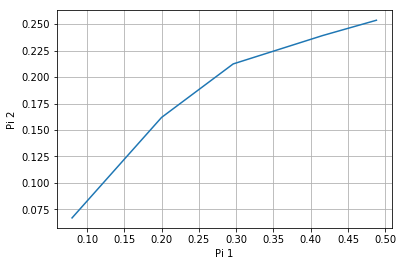

In [486]:
plt.plot(Pi_2,Pi_1)
plt.grid()
plt.xlabel('Pi 1')
plt.ylabel('Pi 2')
plt.show()

In [487]:
# Se ajustan los datos a un polinomio de grado 2

In [491]:
print 'Los coeficientes que se ajustan a la relación de orden 2 Pi_1 vs. Pi_2 son: '
coeficientes = np.polyfit(Pi_2,Pi_1,2)
print coeficientes

Los coeficientes que se ajustan a la relación de orden 2 Pi_1 vs. Pi_2 son: 
[-1.107101    1.07537403 -0.01078475]


Ahora, se puede calcular entonces para $A_{1}/A_{2} = 0.35$, y $V_{1}=3.75 ft/s$, con agua.

In [492]:
dPf = (1.94*(3.75**2))*(coeficientes[0]*0.35**2+coeficientes[1]*0.35+coeficientes[2])

In [494]:
print 'El aumento en la presión es: '
print dPf

El aumento en la presión es: 
6.27404051359


# Flujo viscoso en tuberías.

## 1.

En ocasiones, la ecuación siguiente es usada en lugar de la ecuación de Colebrook:

\begin{equation}
    f= \frac{1.325}{(ln(\frac{\epsilon}{3.7D}+\frac{5.74}{Re^{0.9}}))^2}
\end{equation}

para $10^{-6} \leq \frac{\epsilon}{D} \leq 10^{2}$, y $5000<Re<10^{8}$. Una ventaja de esta ecuación es que dado Re y $\epsilon / D$, no se requiere iterar para obtener el coeficiente de fricción $f$. Grafique la diferencia en porcentaje del $f$, comparando con el obtenido a partir de la ecuación original de Colebrook para números de Reynolds dentro del rango mencionado anteriormente, con $\frac{\epsilon}{D} = 10^{-4}$.

#### Desarrollo

Recordemos la ecuación de Colebrook original:

\begin{equation}
    \frac{1}{\sqrt{f}}=-2log(\frac{\frac{\epsilon}{D}}{3.7}+\frac{2.51}{Re\sqrt{f}})
\end{equation}

Se calculará el error como:

\begin{equation}
    \Delta f = \frac{f-f_{app}}{f}
\end{equation}

donde $f_{app} $ es el resultado obtenido a partir de la aproximación, y $f$ es el obtenido a partir de la ecuación original de Colebrook.

In [573]:
# Tenemos que:

e_d = 10**-4

# Creamos un arreglo con los números de Reynolds para trabajar, 
# cuya magnitud aumenta multiplicando por 1.5 el número anterior.
Re=[]
Re.append(5000)
for i in range(1,30):
    Re.append(Re[-1]*1.5)
Re=np.array(Re).astype(float)

In [574]:
# Se calcula entonces fapp:

fapp = 1.325/((np.log(e_d/3.7+5.74/Re**0.9))**2)

In [575]:
# ahora definimos una función, que itere y encuentre el factor de fricción a partir de 
# la ecuación de Colebrook original.

# inicialmente una función que devuelva el valor de f, dado uno inicial f0.
def f_colebrook(f0,Rei,e_d):
    return (1/(-2*np.log10((2.51/(Rei*np.sqrt(f0))) + (e_d/(3.7)))))**2

# Ahora una función que itere:

def iter_colebrook(f0,tol,Rei,e_d):
    f=2 #cualquier número lejos del f0
    while abs(f0-f)>tol:
        f0=f
        f=f_colebrook(f0,Rei,e_d)
    return f

In [577]:
#Ahora calculamos para todos los Reynolds

f = []
deltaf = []
print "Re // f // fapp // delta f %"
print "                                "
for i in range(len(Re)):
    f.append(iter_colebrook(0.02,0.000001,Re[i],e_d))
    deltaf.append((f[-1]-fapp[i])*100/f[-1])
    print str(Re[i])+' // '+str(f[-1])+' // '+str(fapp[i])+' // '+str(deltaf[-1])
    
f=np.array(f)
deltaf=np.array(deltaf)

Re // f // fapp // delta f %
                                
5000.0 // 0.0375045942093 // 0.0379605091753 // -1.2156243138
7500.0 // 0.033505435 // 0.0337193518491 // -0.638454176549
11250.0 // 0.0301040800545 // 0.0301684134214 // -0.213703148225
16875.0 // 0.0271946152235 // 0.027171138882 // 0.0863271692706
25312.5 // 0.0246948619015 // 0.0246248332922 // 0.283575626441
37968.75 // 0.0225401556516 // 0.0224515384334 // 0.39315264541
56953.125 // 0.020680042684 // 0.0205917151417 // 0.42711489348
85429.6875 // 0.0190752639502 // 0.0189997372515 // 0.395940517042
128144.53125 // 0.0176950096016 // 0.0176405291259 // 0.307886104138
192216.796875 // 0.016515787128 // 0.0164868771683 // 0.175044395311
288325.195312 // 0.0155189905561 // 0.0155170941665 // 0.0122198001
432487.792969 // 0.0146891366242 // 0.0147128749498 // -0.161604634844
648731.689453 // 0.0140121605678 // 0.0140573804701 // -0.322718984308
973097.53418 // 0.0134731326025 // 0.0135337790379 // -0.450128690728
1459646.30

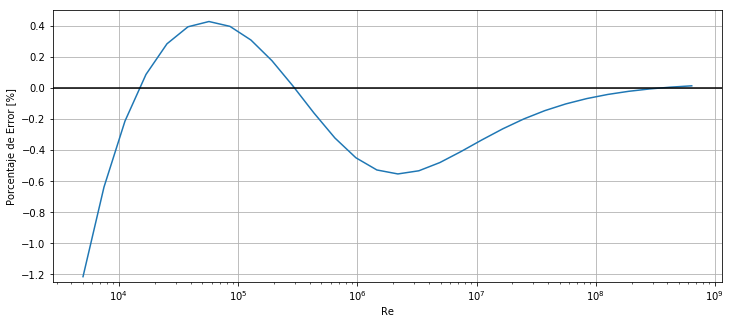

In [581]:
plt.figure(figsize=(12,5))
plt.plot(Re,deltaf)
plt.xscale('log')
plt.grid()
plt.axhline(0,color='k')
plt.xlabel('Re')
plt.ylabel('Porcentaje de Error [%]')
plt.ylim(-1.25,0.5)
plt.show()